In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [4]:
from sklearn.datasets import load_iris
data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
rf_model = RandomForestClassifier(n_estimators=3, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_accuracy

1.0

[Text(0.375, 0.9375, 'x[3] <= 0.7\ngini = 0.665\nsamples = 74\nvalue = [44, 37, 39]'),
 Text(0.25, 0.8125, 'gini = 0.0\nsamples = 26\nvalue = [44, 0, 0]'),
 Text(0.5, 0.8125, 'x[3] <= 1.55\ngini = 0.5\nsamples = 48\nvalue = [0, 37, 39]'),
 Text(0.25, 0.6875, 'x[2] <= 4.95\ngini = 0.188\nsamples = 23\nvalue = [0, 34, 4]'),
 Text(0.125, 0.5625, 'gini = 0.0\nsamples = 21\nvalue = [0, 34, 0]'),
 Text(0.375, 0.5625, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 4]'),
 Text(0.75, 0.6875, 'x[3] <= 1.85\ngini = 0.145\nsamples = 25\nvalue = [0, 3, 35]'),
 Text(0.625, 0.5625, 'x[1] <= 3.15\ngini = 0.32\nsamples = 9\nvalue = [0, 3, 12]'),
 Text(0.5, 0.4375, 'x[3] <= 1.75\ngini = 0.142\nsamples = 8\nvalue = [0, 1, 12]'),
 Text(0.375, 0.3125, 'x[0] <= 5.8\ngini = 0.375\nsamples = 3\nvalue = [0, 1, 3]'),
 Text(0.25, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 2]'),
 Text(0.5, 0.1875, 'x[2] <= 5.4\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.375, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0

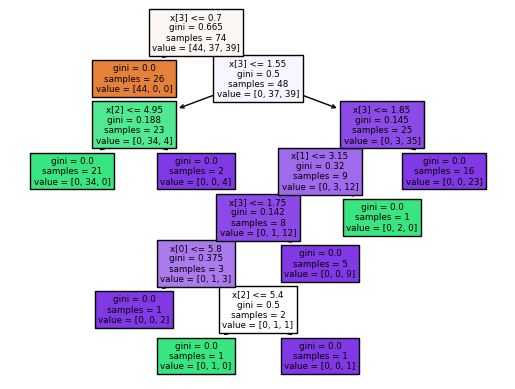

In [8]:
from sklearn import tree
tree.plot_tree(rf_model.estimators_[0], filled=True)

In [15]:
xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_accuracy

C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:158: UserWarning: [15:33:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


1.0

In [14]:
lgb_model = lgb.LGBMClassifier(n_estimators=3, random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
lgb_accuracy = accuracy_score(y_test, lgb_pred)
lgb_accuracy

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

1.0

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

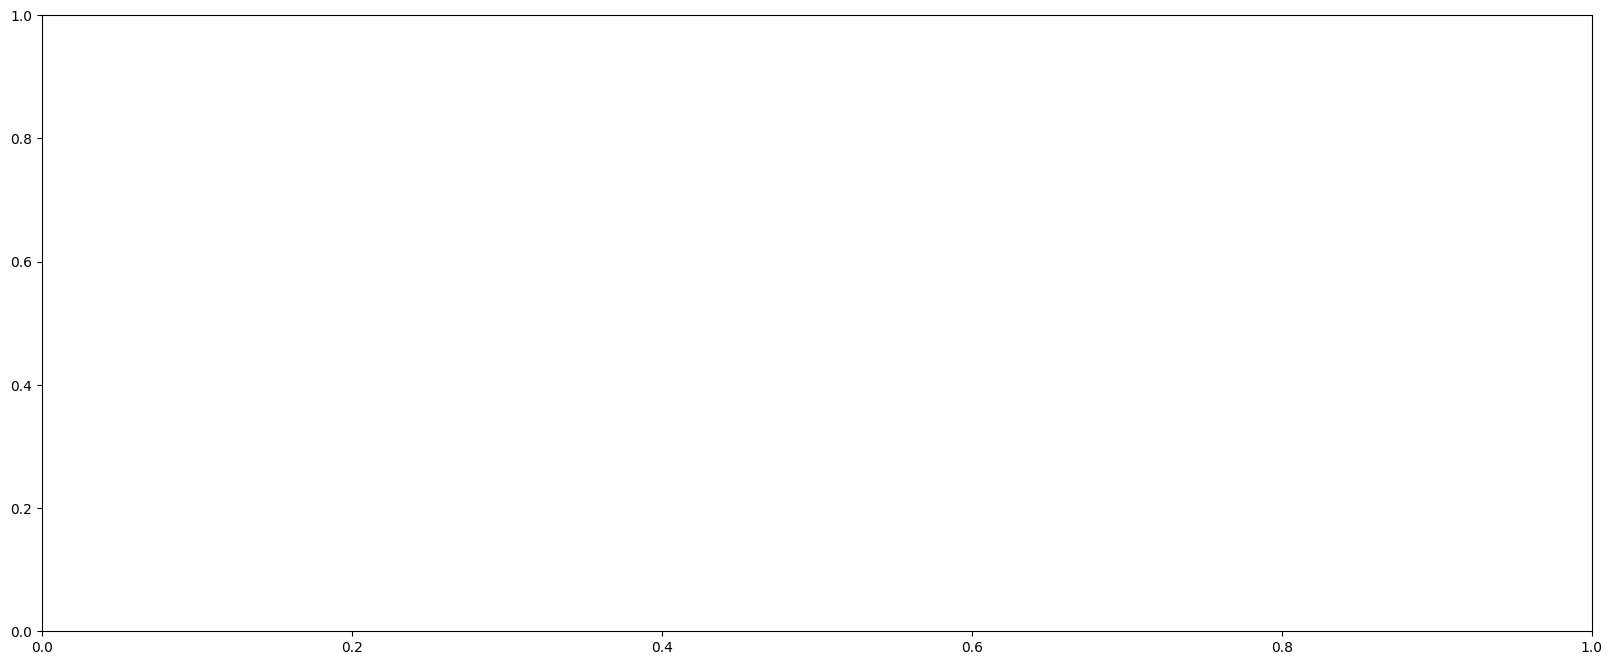

In [15]:
lgb.plot_tree(lgb_model, figsize=(20, 8))

In [17]:
cat_model = CatBoostClassifier(n_estimators=100, verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
cat_accuracy = accuracy_score(y_test, cat_pred)
cat_accuracy

1.0

In [9]:
ada_model = AdaBoostClassifier(n_estimators=3, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)
ada_accuracy

C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9666666666666667

[Text(0.5, 0.75, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [0.333, 0.333, 0.333]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 40\nvalue = [0.333, 0.0, 0.0]'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 80\nvalue = [0.0, 0.333, 0.333]')]

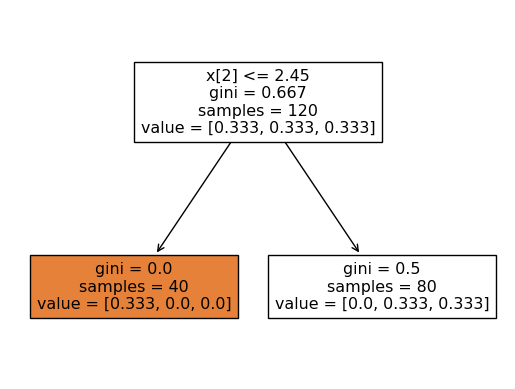

In [12]:
tree.plot_tree(ada_model.estimators_[2], filled=True)